Importing libraries

In [78]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading the dataset

In [103]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/renfe.csv")
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [61]:
df['price'].describe()

count    2.269090e+06
mean     6.338550e+01
std      2.578319e+01
min      1.545000e+01
25%      4.375000e+01
50%      6.030000e+01
75%      7.880000e+01
max      2.142000e+02
Name: price, dtype: float64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
Unnamed: 0     int64
insert_date    object
origin         object
destination    object
start_date     object
end_date       object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), int64(1), object(8)
memory usage: 196.8+ MB


Removing the columns that are not required:

In [104]:
df.drop(columns=['insert_date','Unnamed: 0'],inplace=True)
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


Checking for null values

In [105]:
df.isnull().sum()

origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

## Filling the Nan values

In [106]:
df['price'].fillna(df['price'].mean(),inplace=True)
df.isnull().sum()

origin            0
destination       0
start_date        0
end_date          0
train_type        0
price             0
train_class    9664
fare           9664
dtype: int64

In [107]:
df['fare'].value_counts()

Promo                  1733423
Flexible                582743
Adulto ida              179844
Promo +                  73778
Individual-Flexible        214
Mesa                        99
Grupos Ida                   6
Name: fare, dtype: int64

In [108]:
df['fare'].fillna('Promo',inplace=True)
df.isnull().sum()

origin            0
destination       0
start_date        0
end_date          0
train_type        0
price             0
train_class    9664
fare              0
dtype: int64

In [109]:
df['train_class'].value_counts()

Turista               1950303
Preferente             256082
Turista Plus           192908
Turista con enlace     169549
Cama Turista             1051
Cama G. Clase             214
Name: train_class, dtype: int64

In [110]:
df['train_class'].fillna('Turista',inplace=True)
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

## Analysis

Text(0.5,1,'Number of people boarding from different stations')

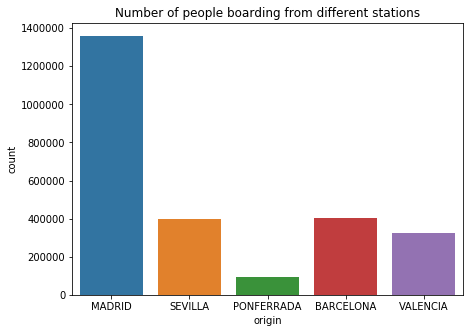

In [70]:
plt.figure(figsize=(7,5))
sns.countplot(df.origin)
plt.title('Number of people boarding from different stations')

Therefore, maximum number of people board Madrid.

Text(0.5,1,'Number of people getting off at different stations')

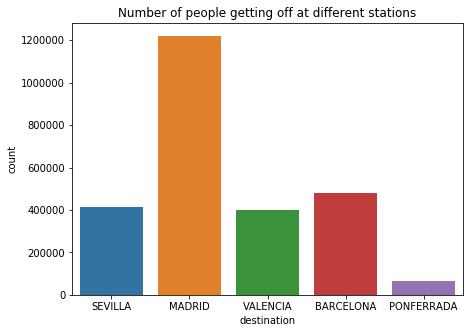

In [71]:
plt.figure(figsize=(7,5))
sns.countplot(df.destination)
plt.title('Number of people getting off at different stations')

The most common destination is also Madrid.

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Train class - Price')

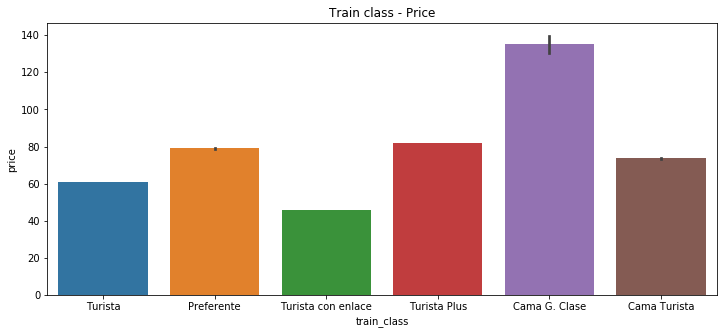

In [72]:
plt.figure(figsize=(12,5))
sns.barplot(x='train_class',y='price',data=df)
plt.title('Train class - Price')

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Train type - Price')

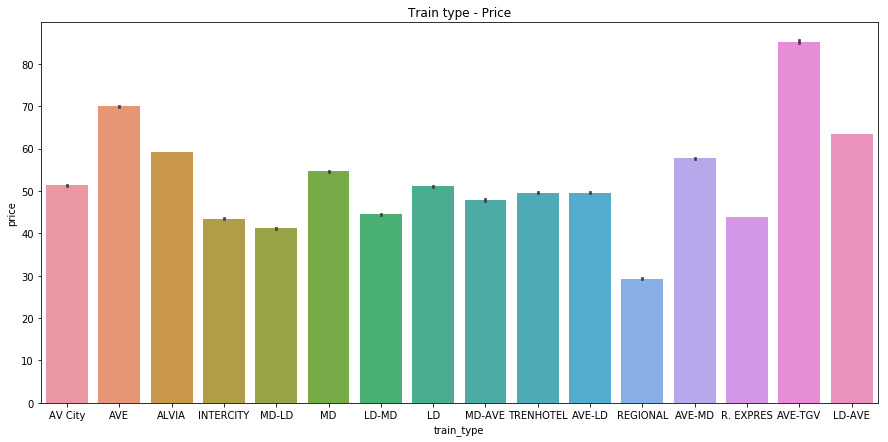

In [73]:
plt.figure(figsize=(15,7))
sns.barplot(x='train_type',y='price',data=df)
plt.title('Train type - Price')

### Changing the date and time values from string to numeric format

To expand start date column :

In [111]:
date = pd.to_datetime(df['start_date'])
df['start_date'+'_hour']=date.dt.hour
df['start_date'+'_month']=date.dt.month
df['start_date'+'_day']=date.dt.weekday_name
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,start_date_hour,start_date_month,start_date_day
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,6,5,Wednesday
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,7,5,Wednesday
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,7,5,Wednesday
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,8,5,Wednesday
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo,8,5,Wednesday


To expand end date column :

In [112]:
date = pd.to_datetime(df['end_date'])
df['end_date_hour']=date.dt.hour
df['end_date_month']=date.dt.month
df['end_date_day']=date.dt.weekday_name
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,start_date_hour,start_date_month,start_date_day,end_date_hour,end_date_month,end_date_day
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,6,5,Wednesday,9,5,Wednesday
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,7,5,Wednesday,9,5,Wednesday
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,7,5,Wednesday,9,5,Wednesday
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,8,5,Wednesday,10,5,Wednesday
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo,8,5,Wednesday,11,5,Wednesday


In [113]:
df.corr()

,price,start_date_hour,start_date_month,end_date_hour,end_date_month
price,1.000000,0.075949,-0.134511,-0.005096,-0.134736
start_date_hour,0.075949,1.000000,-0.022564,0.733342,-0.020313
start_date_month,-0.134511,-0.022564,1.000000,0.016098,0.998793
end_date_hour,-0.005096,0.733342,0.016098,1.000000,0.012084
end_date_month,-0.134736,-0.020313,0.998793,0.012084,1.000000


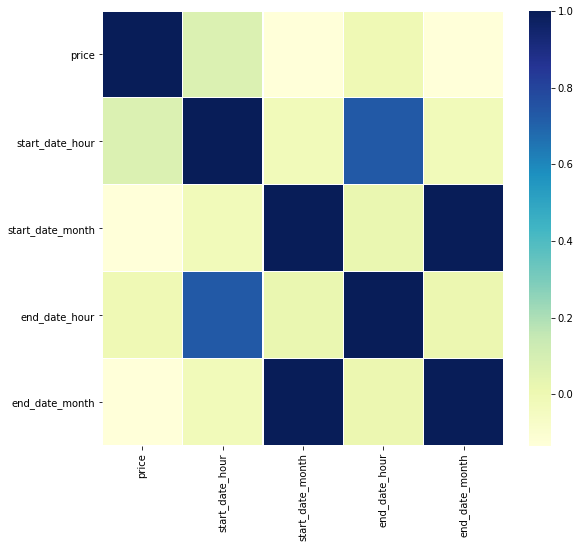

In [118]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.2)